## 实验一、利用神经网络模型进行MNIST数据的分类

In [1]:
import keras
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
# keras.__version__

### 加载数据分为训练数据与测试数据并进行数据归一化

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('训练数据形状：',train_images.shape,'测试数据形状：',test_images.shape)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

训练数据形状： (60000, 28, 28) 测试数据形状： (10000, 28, 28)


### 构建神经网络模型

In [4]:
network = models.Sequential()
network.add(layers.Dense(400, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________


### 利用训练数据进行模型的训练

In [5]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 1.1619 - accuracy: 0.7197
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4692 - accuracy: 0.8777
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3659 - accuracy: 0.8995
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3218 - accuracy: 0.9101
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2937 - accuracy: 0.9171


### 利用测试集进行模型的测试

In [6]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('测试数据准确率', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2724 - accuracy: 0.9238
测试数据准确率 0.923799991607666


### 进行数据的可视化处理，加大epoch观察模型在训练与测试数据集上的情况

In [7]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt


checkpoint_save_path = "./checkpoint_1/mnist.ckpt"
'''
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)
'''

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = network.fit(train_images,
                      train_labels,
                      batch_size=128,
                      epochs=55,
                      validation_data=(test_images, test_labels),
                      callbacks=[cp_callback])
network.summary()

# print(model.trainable_variables)
file = open('./weights_1.txt', 'w')
for v in network.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

Epoch 1/55
469/469 [==============================] - 3s 5ms/step - loss: 0.2734 - accuracy: 0.9226 - val_loss: 0.2567 - val_accuracy: 0.9281
Epoch 2/55
469/469 [==============================] - 2s 5ms/step - loss: 0.2567 - accuracy: 0.9270 - val_loss: 0.2448 - val_accuracy: 0.9309
Epoch 3/55
469/469 [==============================] - 3s 5ms/step - loss: 0.2428 - accuracy: 0.9311 - val_loss: 0.2311 - val_accuracy: 0.9343
Epoch 4/55
469/469 [==============================] - 2s 5ms/step - loss: 0.2305 - accuracy: 0.9347 - val_loss: 0.2209 - val_accuracy: 0.9358
Epoch 5/55
469/469 [==============================] - 2s 5ms/step - loss: 0.2195 - accuracy: 0.9378 - val_loss: 0.2123 - val_accuracy: 0.9388
Epoch 6/55
469/469 [==============================] - 2s 5ms/step - loss: 0.2098 - accuracy: 0.9404 - val_loss: 0.2034 - val_accuracy: 0.9410
Epoch 7/55
469/469 [==============================] - 2s 5ms/step - loss: 0.2011 - accuracy: 0.9428 - val_loss: 0.1955 - val_accuracy: 0.9438
Epoch 

### 可视化绘图

In [20]:
##loss是训练集loss，val_loss是测试集loss
#sparse_categorical_accuracy是训练集sparse_categorical_accuracy，val_sparse_categorical_accuracy是测试集sparse_categorical_accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(dpi=500, figsize=[20, 15])
plt.rcParams["font.sans-serif"] = ["SimHei"]
#subplot函数将图像分为两行一列，这段代码画出第一行
plt.subplot(2, 1, 1)
#plot描述曲线
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
#title函数设置图标题
plt.title('Training and Validation Accuracy',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#画出图例
plt.legend(fontsize=30)

#这段代码画出第二行
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=30)
plt.show()

### 绘制模型的结构图

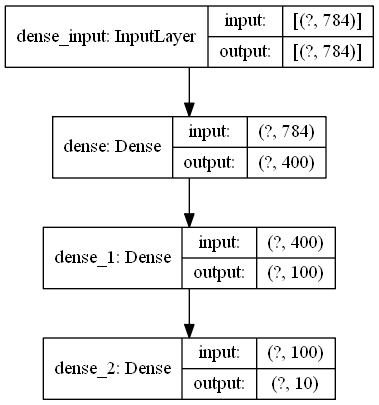

In [9]:
from keras.models import load_model
from keras.utils import plot_model


#输出模型，将结果保存到项目文件夹中
plot_model(network, to_file='model_1.png', show_shapes='True')